In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To use statistical functions
import scipy.stats as stats

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/content/drive/MyDrive/CarData.csv")

In [6]:
df.shape

(31377, 13)

In [7]:
df.head()

,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type,age,car_brand,car_model
0,XT-R D-4D,995,Manual,39.800,Diesel,2005,1995.000,117000,Black,Estate,19,Toyota,RAV4
1,s 1.8 VVT-i SR Hatchback,1000,Manual,39.200,Petrol,2007,1798.000,137669,Red,Hatchback,17,Toyota,Yaris
2,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,1200,Manual,62.800,Diesel,2012,2000.000,338345,Silver,Other,12,Toyota,Avensis
3,a 1.4 S 3dr Hatchback,1295,Manual,41.500,Petrol,2001,1398.000,59000,Red,Hatchback,23,Toyota,Corolla
4,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,1495,Manual,48.700,Petrol,2009,1329.000,134000,Red,Hatchback,15,Toyota,Auris


In [8]:
df.tail()

,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type,age,car_brand,car_model
31372,1.5 Hybrid Design 5dr CVT Hatchback,16985,Automatic,68.900,Hybrid,2020,1490.000,6798,Blue,Hatchback,4,Toyota,Yaris
31373,s 1.5 Hybrid Design 5dr CVT Hatchback,17222,Automatic,68.900,Hybrid,2021,1500.000,17027,Black,Hatchback,3,Toyota,Yaris
31374,1.5 Hybrid Design 5dr CVT Hatchback,16985,Automatic,68.900,Hybrid,2022,1490.000,21200,Blue,Hatchback,2,Toyota,Yaris
31375,1.8 VVT-h GPF Icon Hatchback 5dr Petrol Hybrid...,16700,Automatic,62.800,Hybrid,2021,1798.000,22000,Blue,Hatchback,3,Toyota,Corolla
31376,s 1.5 Hybrid Icon 5dr CVT Hatchback,16000,Automatic,68.900,Hybrid,2021,1500.000,24553,White,Hatchback,3,Toyota,Yaris


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31377 entries, 0 to 31376
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              31377 non-null  object 
 1   price              31377 non-null  int64  
 2   transmission       31377 non-null  object 
 3   miles_per_gallaon  31377 non-null  float64
 4   fuel               31377 non-null  object 
 5   year               31377 non-null  int64  
 6   cubic_capacity     31377 non-null  float64
 7   milage             31377 non-null  int64  
 8   color              31377 non-null  object 
 9   type               31377 non-null  object 
 10  age                31377 non-null  int64  
 11  car_brand          31324 non-null  object 
 12  car_model          31324 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 3.1+ MB


In [10]:
df[df.duplicated()].count()

model                471
price                471
transmission         471
miles_per_gallaon    471
fuel                 471
year                 471
cubic_capacity       471
milage               471
color                471
type                 471
age                  471
car_brand            471
car_model            471
dtype: int64

In [11]:
df.nunique()

model                16697
price                 6670
transmission             4
miles_per_gallaon      264
fuel                     4
year                    33
cubic_capacity         303
milage               18020
color                  755
type                    17
age                     33
car_brand               15
car_model              308
dtype: int64

In [12]:
df.isna().sum()

model                 0
price                 0
transmission          0
miles_per_gallaon     0
fuel                  0
year                  0
cubic_capacity        0
milage                0
color                 0
type                  0
age                   0
car_brand            53
car_model            53
dtype: int64

In [13]:
df3 = df.copy()
list_str_obj_cols = df3.columns[df3.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df3[str_obj_col] = df3[str_obj_col].astype("category")

In [14]:
df3.dtypes

model                category
price                   int64
transmission         category
miles_per_gallaon     float64
fuel                 category
year                    int64
cubic_capacity        float64
milage                  int64
color                category
type                 category
age                     int64
car_brand            category
car_model            category
dtype: object

In [15]:
df3.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
model,31377,16697,Hatchback,633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,31377.000,NaN,NaN,NaN,21278.708,23650.987,695.000,6795.000,15990.000,26493.000,1099900.000
transmission,31377,4,Automatic,13572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
miles_per_gallaon,31377.000,NaN,NaN,NaN,51.050,24.501,0.100,39.200,47.900,57.600,478.000
fuel,31377,4,Petrol,15436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,31377.000,NaN,NaN,NaN,2016.438,5.220,1970.000,2013.000,2018.000,2021.000,2024.000
cubic_capacity,31377.000,NaN,NaN,NaN,1975.273,823.475,0.000,1461.000,1968.000,2143.000,39820.000
milage,31377.000,NaN,NaN,NaN,50663.364,40460.461,0.000,16400.000,42989.000,79000.000,1060000.000
color,31377,755,Black,5689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,31377,17,Hatchback,10357,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df3.isna().sum()

model                 0
price                 0
transmission          0
miles_per_gallaon     0
fuel                  0
year                  0
cubic_capacity        0
milage                0
color                 0
type                  0
age                   0
car_brand            53
car_model            53
dtype: int64

In [17]:
imputation = ["type"]
df3[imputation] = df3[imputation].apply(lambda x: x.fillna(x.mode()), axis=0)
df3.isna().sum()

model                 0
price                 0
transmission          0
miles_per_gallaon     0
fuel                  0
year                  0
cubic_capacity        0
milage                0
color                 0
type                  0
age                   0
car_brand            53
car_model            53
dtype: int64

In [18]:
mode = df3["type"].mode().iat[0]
df3["type"].fillna(mode, inplace =True)
print(df3["type"].isna().sum())
df3["type"].value_counts()

0


Hatchback            10357
SUV                   7776
Estate                4021
Saloon                3472
Coupe                 2004
Convertible           1589
Other                 1053
MPV                    878
Pick Up                144
4X4                     59
People Carrier          14
Roadster                 4
Station Wagon            2
Passenger Carrier        1
Four Wheel Drive         1
Crossover                1
Sports                   1
Name: type, dtype: int64

In [19]:
df3.shape

(31377, 13)

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31377 entries, 0 to 31376
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   model              31377 non-null  category
 1   price              31377 non-null  int64   
 2   transmission       31377 non-null  category
 3   miles_per_gallaon  31377 non-null  float64 
 4   fuel               31377 non-null  category
 5   year               31377 non-null  int64   
 6   cubic_capacity     31377 non-null  float64 
 7   milage             31377 non-null  int64   
 8   color              31377 non-null  category
 9   type               31377 non-null  category
 10  age                31377 non-null  int64   
 11  car_brand          31324 non-null  category
 12  car_model          31324 non-null  category
dtypes: category(7), float64(2), int64(4)
memory usage: 2.4 MB


In [21]:
df3.head()

,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type,age,car_brand,car_model
0,XT-R D-4D,995,Manual,39.800,Diesel,2005,1995.000,117000,Black,Estate,19,Toyota,RAV4
1,s 1.8 VVT-i SR Hatchback,1000,Manual,39.200,Petrol,2007,1798.000,137669,Red,Hatchback,17,Toyota,Yaris
2,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,1200,Manual,62.800,Diesel,2012,2000.000,338345,Silver,Other,12,Toyota,Avensis
3,a 1.4 S 3dr Hatchback,1295,Manual,41.500,Petrol,2001,1398.000,59000,Red,Hatchback,23,Toyota,Corolla
4,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,1495,Manual,48.700,Petrol,2009,1329.000,134000,Red,Hatchback,15,Toyota,Auris


Exploratory Data Analysis (EDA)

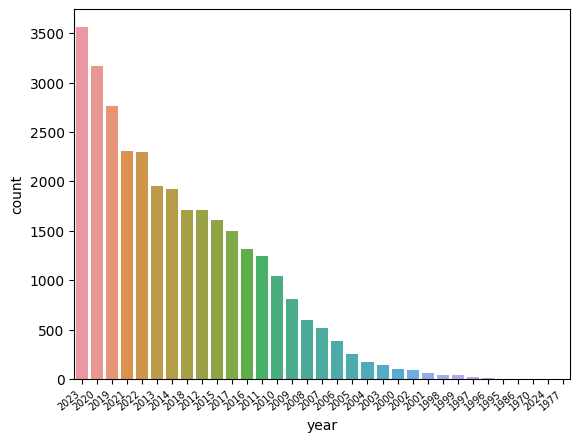

In [22]:
ax = sns.countplot(data=df3,x='year',order=df3['year'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.show()

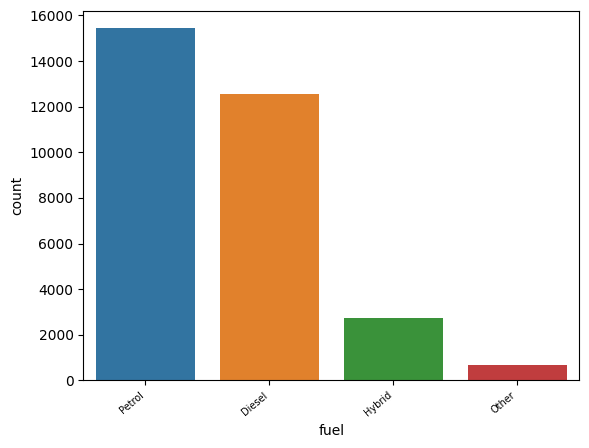

In [23]:
ax = sns.countplot(data=df3,x='fuel',order=df3['fuel'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.show()

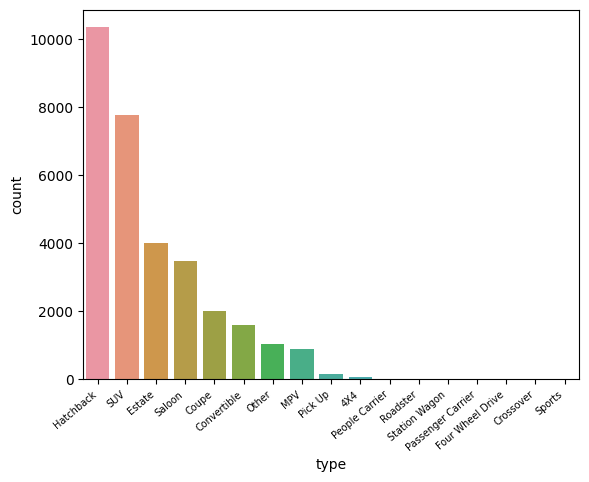

In [24]:
ax = sns.countplot(data=df3,x='type',order=df3['type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.show()

In [25]:
df3["type"]= df3["type"].str.replace("x","X")

In [26]:
df3['type'].value_counts(normalize=True)*100

Hatchback           33.008
SUV                 24.782
Estate              12.815
Saloon              11.065
Coupe                6.387
Convertible          5.064
Other                3.356
MPV                  2.798
Pick Up              0.459
4X4                  0.188
People Carrier       0.045
Roadster             0.013
Station Wagon        0.006
Crossover            0.003
Passenger Carrier    0.003
Sports               0.003
Four Wheel Drive     0.003
Name: type, dtype: float64

In [27]:
df3["milage"].mean()

50663.36402460401

In [28]:
df3["miles_per_gallaon"].mean()

51.04954903273097

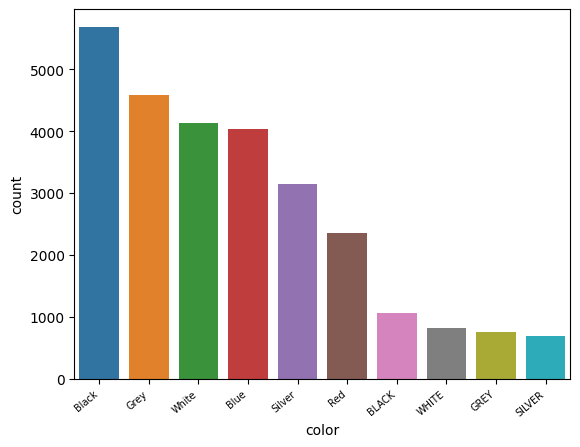

In [29]:
ax = sns.countplot(data=df3,x='color',order=df3['color'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.show()

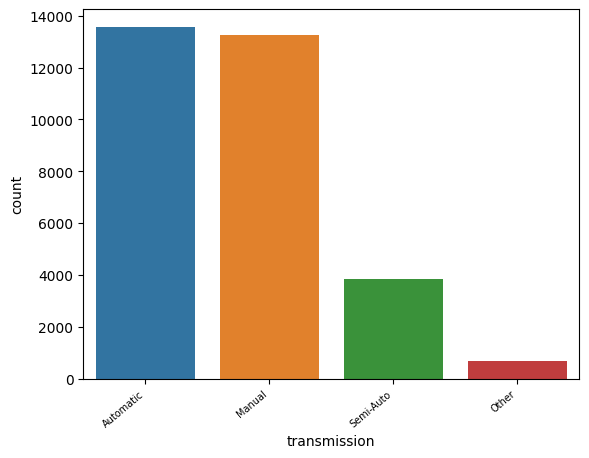

In [30]:
ax = sns.countplot(data=df3,x='transmission',order=df3['transmission'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.show()

In [31]:
df3.sort_values(by="price").tail(10)

,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type,age,car_brand,car_model
27495,BRABUS 720 HP 3.7T 992 Turbo S Convertible Con...,299995,Automatic,23.300,Petrol,2023,3745.000,100,Grey,Convertible,1,Porsche,911
27494,BRABUS 820 HP 3.7T 992 Turbo S Coupe Coupe,309995,Automatic,23.500,Petrol,2023,3745.000,100,Black,Coupe,1,Porsche,911
27493,GT2 RS PDK. HUGE SPECIFICATION. WEISSACH & CLU...,319995,Automatic,23.900,Petrol,2018,3800.000,4155,Silver,Coupe,6,Porsche,911
13871,BRABUS WIDESTAR 700HP 4.0 G63 V8 BiTurbo AMG SUV,329995,Automatic,21.400,Petrol,2023,3982.000,80,Black,SUV,1,Mercedes-Benz,G Class
27492,GT2 RS 2dr PDK Coupe,339950,Automatic,23.900,Petrol,2018,3800.000,6800,Red,Coupe,6,Porsche,911
13870,BRABUS WIDESTAR 800 HP 4.0 G63 V8 BiTurbo AMG SUV,359995,Automatic,21.400,Petrol,2023,3982.000,100,Black,SUV,1,Mercedes-Benz,G Class
13869,ROADSTER. BELIEVED TO BE 1 OF 9 UK SUPPLIED CA...,379995,Automatic,19.500,Petrol,2007,5439.000,12038,Silver,Convertible,17,Mercedes-Benz,SLR Mclaren
27491,GT3 RS PDK. WEISSACH & CLUBSPORT PACKS. FRONT ...,379995,Automatic,21.100,Petrol,2023,3996.000,12,Black,Coupe,1,Porsche,911
27490,4.0 GT3 RS Coupe 2dr Petrol PDK Euro 6 (525 ps...,562800,Automatic,21.100,Petrol,2023,3996.000,39,SILVER,Coupe,1,Porsche,911
13868,1.8 B180 CDI BLUEEFFICIENCY SE 5d 109 BHP MPV,1099900,Automatic,64.200,Diesel,2014,1796.000,18700,GREY,MPV,10,Mercedes-Benz,B Class


In [32]:
def histogram_boxplot(df3, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=df3, x=feature, ax=ax_box2, showmeans=True, color="gray"
    )
    sns.histplot(
        data=df2, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df3, x=feature, kde=True, ax=ax_hist2
    )
    ax_hist2.axvline(
        df3[feature].mean(), color="pink", linestyle="--"
    )
    ax_hist2.axvline(
        df3[feature].median(), color="red", linestyle="-"
    )

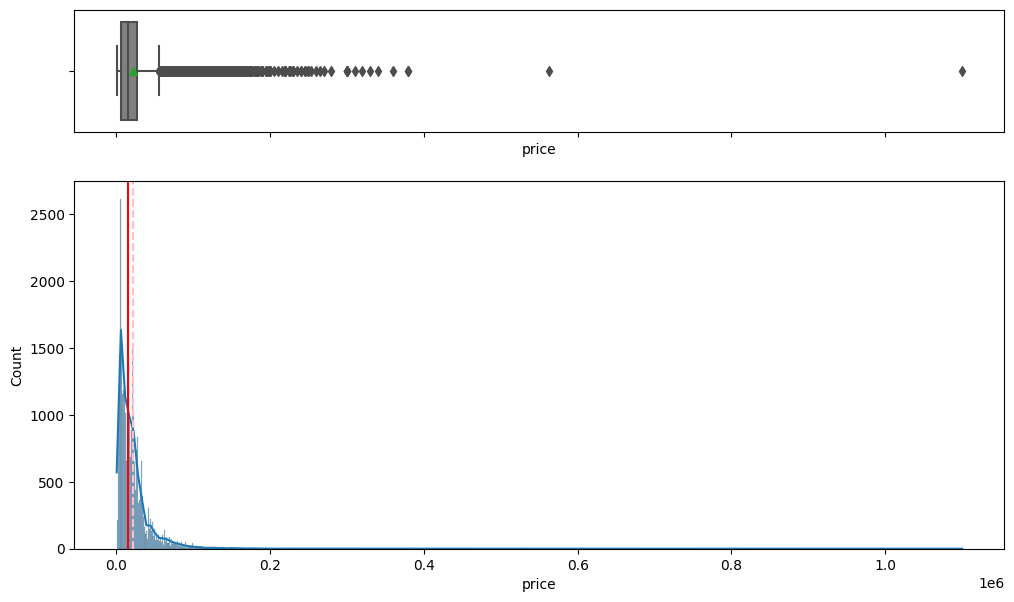

In [33]:
histogram_boxplot(df3, "price")

In [34]:
df3.groupby("type")["miles_per_gallaon"].mean()

type
4X4                 49.551
Convertible         38.465
Coupe               39.830
Crossover           46.300
Estate              50.853
Four Wheel Drive    36.700
Hatchback           56.036
MPV                 53.219
Other               44.915
Passenger Carrier   42.800
People Carrier      45.093
Pick Up             32.396
Roadster            41.100
SUV                 49.968
Saloon              53.223
Sports              40.400
Station Wagon       43.400
Name: miles_per_gallaon, dtype: float64

In [35]:
df3.groupby("type")["price"].mean()

type
4X4                 17002.017
Convertible         22081.018
Coupe               33498.522
Crossover           22695.000
Estate              25046.509
Four Wheel Drive    24880.000
Hatchback           12634.009
MPV                 16414.222
Other               17058.031
Passenger Carrier   55491.000
People Carrier      59199.429
Pick Up             35615.340
Roadster            34447.250
SUV                 29803.318
Saloon              18005.266
Sports               5200.000
Station Wagon       18274.500
Name: price, dtype: float64

In [36]:
df3.groupby("fuel")["miles_per_gallaon"].mean()

fuel
Diesel   52.038
Hybrid   77.301
Other    82.032
Petrol   44.253
Name: miles_per_gallaon, dtype: float64

In [37]:
df3.groupby("fuel")["price"].mean()

fuel
Diesel   18917.442
Hybrid   29163.283
Other    28198.430
Petrol   21497.579
Name: price, dtype: float64

In [38]:
df3.groupby("transmission")["price"].mean()

transmission
Automatic   28361.631
Manual      10704.511
Other       19449.979
Semi-Auto   33137.943
Name: price, dtype: float64

In [39]:
df3.groupby("transmission")["fuel"].value_counts()

transmission  fuel  
Automatic     Diesel    6378
              Petrol    5092
              Hybrid    1585
              Other      517
Manual        Petrol    8206
              Diesel    4710
              Hybrid     237
              Other      115
Other         Petrol     330
              Diesel     233
              Hybrid     117
              Other       24
Semi-Auto     Petrol    1808
              Diesel    1214
              Hybrid     809
              Other        2
Name: fuel, dtype: int64

In [40]:
df3.groupby("transmission")["miles_per_gallaon"].mean()

transmission
Automatic   48.287
Manual      53.315
Other       59.466
Semi-Auto   51.443
Name: miles_per_gallaon, dtype: float64

In [41]:
df3["age"] = df3["year"].max()-df3["year"]

In [42]:
df3.columns

Index(['model', 'price', 'transmission', 'miles_per_gallaon', 'fuel', 'year',
       'cubic_capacity', 'milage', 'color', 'type', 'age', 'car_brand',
       'car_model'],
      dtype='object')

In [43]:
df3.corr()

,price,miles_per_gallaon,year,cubic_capacity,milage,age
price,1.000,-0.171,0.469,0.490,-0.466,-0.469
miles_per_gallaon,-0.171,1.000,0.094,-0.281,0.036,-0.094
year,0.469,0.094,1.000,-0.092,-0.705,-1.000
cubic_capacity,0.490,-0.281,-0.092,1.000,0.051,0.092
milage,-0.466,0.036,-0.705,0.051,1.000,0.705
age,-0.469,-0.094,-1.000,0.092,0.705,1.000


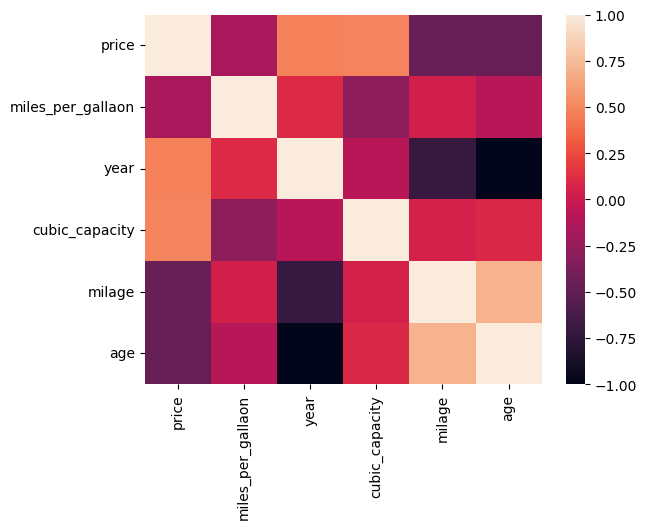

In [44]:
hmap = sns.heatmap(df3.corr())

In [45]:
car_brand= ['Toyota', 'Land Rover', 'Porsche', 'Nissan', 'Ford', 'BMW', 'Volkswagen', 'Mazda', 'Skoda', 'Jaguar', 'Mitsubishi', 'Suzuki', 'Mercedes-Benz', 'Renault', 'Audi']
pat=r'({})'.format('|'.join(car_brand)) + '(.+)'

In [46]:
df3

,model,price,transmission,miles_per_gallaon,fuel,year,cubic_capacity,milage,color,type,age,car_brand,car_model
0,XT-R D-4D,995,Manual,39.800,Diesel,2005,1995.000,117000,Black,Estate,19,Toyota,RAV4
1,s 1.8 VVT-i SR Hatchback,1000,Manual,39.200,Petrol,2007,1798.000,137669,Red,Hatchback,17,Toyota,Yaris
2,s D-4d T2 SPARES OR REPAIRS/STARTS AND DRIVES ...,1200,Manual,62.800,Diesel,2012,2000.000,338345,Silver,Other,12,Toyota,Avensis
3,a 1.4 S 3dr Hatchback,1295,Manual,41.500,Petrol,2001,1398.000,59000,Red,Hatchback,23,Toyota,Corolla
4,1.33 VVT-i T3 (s/s) 5dr Trade Sale Hatchback,1495,Manual,48.700,Petrol,2009,1329.000,134000,Red,Hatchback,15,Toyota,Auris
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31372,1.5 Hybrid Design 5dr CVT Hatchback,16985,Automatic,68.900,Hybrid,2020,1490.000,6798,Blue,Hatchback,4,Toyota,Yaris
31373,s 1.5 Hybrid Design 5dr CVT Hatchback,17222,Automatic,68.900,Hybrid,2021,1500.000,17027,Black,Hatchback,3,Toyota,Yaris
31374,1.5 Hybrid Design 5dr CVT Hatchback,16985,Automatic,68.900,Hybrid,2022,1490.000,21200,Blue,Hatchback,2,Toyota,Yaris
31375,1.8 VVT-h GPF Icon Hatchback 5dr Petrol Hybrid...,16700,Automatic,62.800,Hybrid,2021,1798.000,22000,Blue,Hatchback,3,Toyota,Corolla


In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31377 entries, 0 to 31376
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   model              31377 non-null  category
 1   price              31377 non-null  int64   
 2   transmission       31377 non-null  category
 3   miles_per_gallaon  31377 non-null  float64 
 4   fuel               31377 non-null  category
 5   year               31377 non-null  int64   
 6   cubic_capacity     31377 non-null  float64 
 7   milage             31377 non-null  int64   
 8   color              31377 non-null  category
 9   type               31377 non-null  object  
 10  age                31377 non-null  int64   
 11  car_brand          31324 non-null  category
 12  car_model          31324 non-null  category
dtypes: category(6), float64(2), int64(4), object(1)
memory usage: 2.6+ MB


In [48]:
df4 = df3.copy()
list_str_obj_cols = df4.columns[df4.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df4[str_obj_col] = df4[str_obj_col].astype("category")

In [49]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31377 entries, 0 to 31376
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   model              31377 non-null  category
 1   price              31377 non-null  int64   
 2   transmission       31377 non-null  category
 3   miles_per_gallaon  31377 non-null  float64 
 4   fuel               31377 non-null  category
 5   year               31377 non-null  int64   
 6   cubic_capacity     31377 non-null  float64 
 7   milage             31377 non-null  int64   
 8   color              31377 non-null  category
 9   type               31377 non-null  category
 10  age                31377 non-null  int64   
 11  car_brand          31324 non-null  category
 12  car_model          31324 non-null  category
dtypes: category(7), float64(2), int64(4)
memory usage: 2.4 MB


In [50]:
df5 = df4.copy()
df5["price"] = np.log(df4["price"])

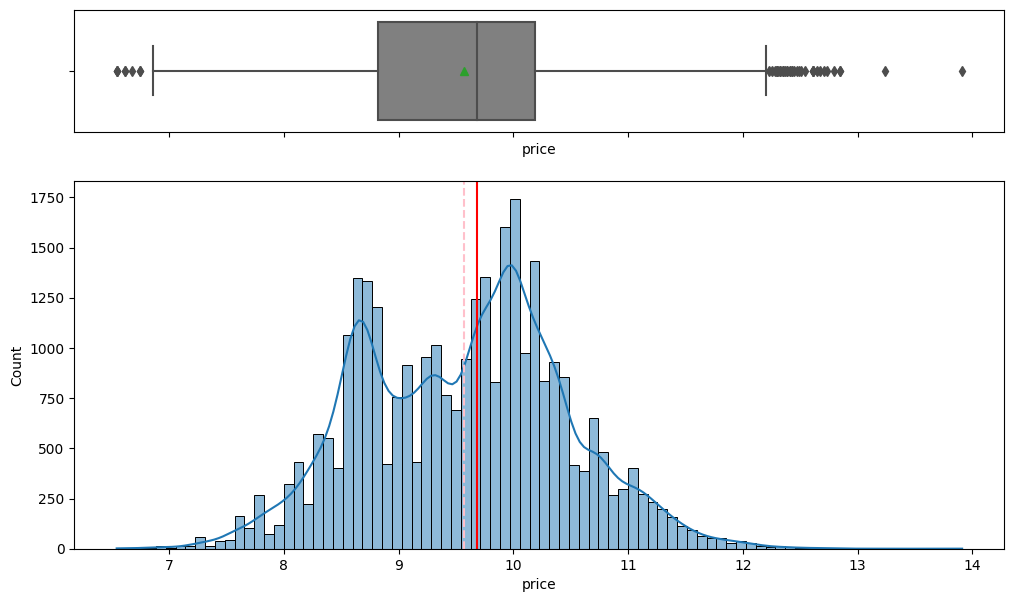

In [51]:
histogram_boxplot(df5, "price")

In [75]:
#Event 1: The probability of a car being 2016 year
probability_event1 = len(df4[df4['year'] == 2016]) / len(df4)

#Event 2: The probability of a car being black
df4['color'] = df4['color'].str.lower()
probability_event2 = len(df4[df4['color'] == 'black']) / len(df4)


In [76]:
print(probability_event1)
print(probability_event2)

0.04203716097778628
0.2153806928641999


In [79]:
#The probability of a 2016 model car to be black
conditional_probability_event2_given_event1 = len(df4[(df4['year'] == 2016) & (df4['color'] == 'black')]) / len(df4[df4['year'] == 2016])

#The probability of a black car to be 2016 model
conditional_probability_event1_given_event2 = len(df4[(df4['color'] == 'black') & (df4['year']== 2016)]) / len(df4[df4['color'] == 'black'])

In [80]:
print(conditional_probability_event2_given_event1)
print(conditional_probability_event1_given_event2)

0.19711902956785443
0.03847292098253921


In [98]:
car_color= ['black', 'grey', 'white', 'blue', 'silver', 'red', 'other', 'green', 'orange', 'beige', 'unknown', 'brown', 'yellow', 'gold', 'bronze', 'purple', 'turquoise', 'multicolour']
pattern = '|'.join(car_color)
import re
df4['car_colors'] = df4['color'].str.extract(f'({pattern})', flags=re.IGNORECASE, expand=False).fillna('other')
df4["car_colors"]= df4["car_colors"].str.replace("unknown","other")

In [90]:
"Null Hypothesis (H0): The prices of used cars do not change with the kilometers."
"Alternative Hypothesis (H1): The prices of used cars increase with the kilometers."

#Significance level is chosen
alpha = 0.05

#Statistical Test
test = stats.ttest_rel(df4["price"], df4["milage"])

#P-Value calculated
p_value = test.pvalue

#Results are interpreted regarding the threshold
if p_value < alpha:
    print("H0 is rejected.")
else:
    print("H0 is accepted.")

0.0
H0 is rejected.


In [92]:
"Null Hypothesis (H0): The prices of used cars do not change with age."
"Alternative Hypothesis (H1): The prices of used cars change with age."

#Significance level is chosen
alpha = 0.05

#Statistical Test
test = stats.ttest_rel(df4["year"], df4["price"])

#P-Value calculated
p_value = test.pvalue

#Results are interpreted regarding the threshold
if p_value < alpha:
    print("H0 is rejected.")
else:
    print("H0 is accepted.")

0.0
H0 is rejected.


In [93]:
"Null Hypothesis (H0): The prices of used cars do not change jointly with the fuel type and transmission type."
"Alternative Hypothesis (H1): The prices of used cars change jointly with the fuel type and transmission type."

#Significance level is chosen
alpha = 0.05

#Statistical Test
test = stats.f_oneway(df4["price"][df4["fuel"] == "Petrol"][df4["transmission"] == "Manual"],
                      df4["price"][df4["fuel"] == "Petrol"][df4["transmission"] == "Automatic"],
                      df4["price"][df4["fuel"] == "Diesel"][df4["transmission"] == "Manual"],
                      df4["price"][df4["fuel"] == "Diesel"][df4["transmission"] == "Automatic"])

#P-Value calculated
p_value = test.pvalue

#Results are interpreted regarding the threshold
if p_value < alpha:
    print("H0 is rejected.")
else:
    print("H0 is accepted.")

0.0
H0 is rejected.


In [97]:
"Null Hypothesis (H0): The prices of used cars do not change with the color."
"Alternative Hypothesis (H1): The prices of used cars change with the color."

#Significance level is chosen
alpha = 0.05

#Statistical Test
test = stats.chi2_contingency(pd.crosstab(df4["car_colors"], df4["price"]).values)

#P-Value calculated
p_value = test.pvalue

#Results are interpreted regarding the threshold
if p_value < alpha:
    print("H0 is rejected.")
else:
    print("H0 is accepted.")

H0 is accepted.
